<img src="https://www.rp.edu.sg/images/default-source/default-album/rp-logo.png" width="200" alt="Republic Polytechnic"/>

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/koayst-rplesson/SST_DP2025/blob/main/L09/L09_Answer.ipynb)

# Setup and Installation

You can run this Jupyter notebook either on your local machine or run it at Google Colab.

* For local machine, it is recommended to install Anaconda and create a new development environment called `SST_DP2025`.
* Pip/Conda install the libraries stated below when necessary.
---

# <font color='red'>ATTENTION</font>

## Google Colab
- If you are running this code in Google Colab, **DO NOT** store the API Key in a text file and load the key later from Google Drive. This is insecure and will expose the key.
- **DO NOT** hard code the API Key directly in the Python code, even though it might seem convenient for quick development.
- You need to enter the API key at python code `getpass.getpass()` when ask.

## Local Environment/Laptop
- If you are running this code locally in your laptop, you can create a env.txt and store the API key there.
- Make sure env.txt is in the same directory of this Jupyter notebook.
- You need to install `python-dotenv` and run the Python code to load in the API key.

---
```
%pip install python-dotenv

from dotenv import load_dotenv

load_dotenv('env.tx')
openai_api_key = os.getenv('OPENAI_API_KEY')
```
---

## GitHub/GitLab
- **DO NOT** `commit` or `push` API Key to services like GitHub or GitLab.



# Lesson 09

- LangChain is a framework built around LLMs.
- Framework offered as a Python or Javascript (Typescript) package.
- Use it to build chatbots, Generative Question-Answer (GQA), summarization and much more.
- Core idea is to “chain” together different components to create more advanced use cases around LLMs.
- Provides developers with a comprehensive set of tools to seamlessly combine multiple prompts working with LLMs effortlessly.

In [ ]:
%%capture --no-stderr
%pip install --quiet -U langchain
%pip install --quiet -U langgraph
%pip install --quiet -U langchain-openai

In [ ]:
# langchain        0.3.11
# langgraph        0.2.59
# langchain-core   0.3.24
# langchain-openai 0.2.12
# openai           1.57.2
# pydantic         2.10.3

In [1]:
import getpass
import os

# setup the OpenAI API Key

# get OpenAI API key ready and enter it when ask
os.environ["OPENAI_API_KEY"] = getpass.getpass()

 ········


## A Simple LLM Application
We will be using [Chat Models](https://python.langchain.com/v0.2/docs/concepts/#chat-models). It takes a sequence of message as inputs and returns chat messages as outputs.

LangChain does not host any of the chat models. It depends on [third party](https://python.langchain.com/docs/integrations/chat/) LLM model providers. We will be using ChatOpenAI due to its popularity and performant. There are a few standard parameters that we can set with the chat models. Two most common are:
- `model`: the name of the model
- `temperature`: the sampling temperature

`temperature` controls the randomness or creativity of the model's output. Low temperature (close to 0) is more deterministic and focused outputs. High temperature (close to 1) is good for creative tasks or generating varied responses.

Chat models in LangChain have a number of (default methods)[https://python.langchain.com/v0.2/docs/concepts/#runnable-interface]. Most of the time, we will be using:
- `stream`: stream back chunks of response
- `invoke`: call the chain on the input
  
Chat models take messages as input. Messages have a role that describes who is saying the message and a content property. We get an `AIMessage` response upon invoking the model with messages.

We can also invoke a chat model with a string. The string is converted to `HumanMessage` and then passed to the model for processing. This interface is consistent across all chat models and models are typically initialised once at the start of each notebook.

In [2]:
# load langchain libraries
from langchain_openai import ChatOpenAI
from langchain.schema import HumanMessage

In [3]:
# create the chat LLM model
chat_model = ChatOpenAI(
    # don't need this if the OpenAI API Key is stored in the environment variable
    #openai_api_key="sk-proj-xxxxxxxxx",

    model = 'gpt-4o-mini'
)

In [4]:
# setup message prompt
text = "What date is Singapore National Day?"
messages = [HumanMessage(content=text)]

In [5]:
# note that Chat Model takes in message objects as input and generate message object as output

response = chat_model.invoke(messages)
print(response.content)

Singapore National Day is celebrated on August 9th each year. This day marks the country's independence from Malaysia in 1965.


## A Simple LLM Application With Prompt Template

**Purpose of Prompt Template**
- Parameterized templates that dynamically generate specific prompts based on user input or other variables.
- By using variables in the template, you can adapt the prompt to specific scenarios without rewriting the entire prompt.
- Keeps your application logic (like API calls or response handling) separate from the prompt text, improving code readability and maintainability

In [6]:
# load langchain libraries
from langchain_openai import ChatOpenAI
from langchain_core.prompts.chat import ChatPromptTemplate

In [7]:
# initialise ChatModel with API key
chat_model = ChatOpenAI(
    model = 'gpt-4o-mini', 
    temperature = 0.3
)

In [8]:
# Prompt template takes in raw user input ({input_language} and {output_language}) and 
# return a prompt that is ready to pass into a language model

system_template = "You are a helpful assistant that translates {input_language} to {output_language}."

human_template = "{text}"
chat_prompt = ChatPromptTemplate.from_messages([
    ("system", system_template),
    ("human", human_template),
])

In [9]:
# trsnslate English to French

messages = chat_prompt.format_messages(
    input_language = "English", 
    output_language = "French", 
    text = "I love programming."
)

response = chat_model.invoke(messages).content
print(response)

J'aime la programmation.


In [10]:
# translate English to Chinese

messages = chat_prompt.format_messages(
    input_language = "English", 
    output_language = "Chinese", 
    text = "I love programming."
)

response = chat_model.invoke(messages).content
print(response)

我热爱编程。


## Streaming

`Runnable` interface is the foundation for working with LangChain components. A unit of work that can be invoked, batched, streamed, transformed and composed.

**Key Methods - (Synchronouse/Asynchronous):**
- `invoke`/`ainvoke`: Transforms a single input into an output.
- `batch`/`abatch`: Transforms multiple inputs into outputs.
- `stream`/`astream`: Outputs are streamed as they are produced.

Streaming is typically used when interfacting with language models to enable real-time or chunked responses. The purpose of this parameter is to allow the model to stream its output piece by piece (e.g., word by word or token by token) instead of waiting for the entire response to be generated.

In [11]:
messages = chat_prompt.format_messages(
    input_language = "English", 
    output_language = "English", 
    text = "What is teh-c siew dai?"
)

In [12]:
# observation:
# the output is streamed/printed piece by piece (eg. word by word or token by token)

for token in chat_model.stream(messages):
    print(token.content, end="")

"Teh-c siew dai" is a term from Hokkien, a Chinese dialect commonly spoken in Southeast Asia, particularly in Malaysia and Singapore. It refers to a type of tea, specifically "tea with milk" (teh) that is served with less sugar (siew dai). "Siew dai" means "less sweet" in Hokkien. So, when you order "teh-c siew dai," you are asking for a cup of tea with milk that is not very sweet.

## Observation

- From the sample codes you just run, you have learned how to create your first simple LLM application. 
- You learned how to work with language model(s) and how to create a prompt template.

## PromptTemplate And LangChain Expression Language (LCEL)

In [13]:
# load langchain libraries
from langchain_openai import ChatOpenAI
from langchain_core.prompts.chat import ChatPromptTemplate
from langchain_core.output_parsers.string import StrOutputParser

In [14]:
# gpt-4 does not have 'instruct' model
# The chat models like gpt-4 and gpt-4-turbo are already instruction-following models.
# They are designed to interpret and respond effectively to instructions provided in the conversatio

llm = ChatOpenAI(
    model = 'gpt-4o-mini',
    temperature = 0.7,
)

output_parser = StrOutputParser()

In [15]:
# setup template 

human_template = "Write {lines} sentences about {topic}."
prompt = ChatPromptTemplate.from_template(human_template)

lines_topic_dict = {
    "lines" : "3", 
    "topic": "Sir Stamford Raffles"
}

In [16]:
# Without piping to StrOutputParser
# StrOutputParser = OutputParser that parses LLMResult into the top likely string

lcel_chain_01 = prompt | llm

lcel_chain_01.invoke(lines_topic_dict)

AIMessage(content='Sir Stamford Raffles was a British colonial administrator and the founder of modern Singapore, establishing it as a strategic trading post in 1819. He played a pivotal role in the expansion of British influence in Southeast Asia and was instrumental in the development of various social and educational reforms in the region. Raffles is also known for his interest in natural history and for his efforts to preserve the biodiversity of the Malay Archipelago.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 83, 'prompt_tokens': 17, 'total_tokens': 100, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_6fc10e10eb', 'finish_reason': 'stop', 'logprobs': None}, id='run-add99593-2032-44d4-9a38-278e353e628c-0', usa

In [17]:
# Pipe to StrOutputParesr

lcel_chain_02 = prompt | llm | output_parser

lcel_chain_02.invoke(lines_topic_dict)

"Sir Stamford Raffles was a British statesman and the founder of modern Singapore, establishing it as a vital trading post in 1819. He played a crucial role in expanding British influence in Southeast Asia and was instrumental in the establishment of the British East India Company's control over the region. Additionally, Raffles was a noted naturalist and contributed significantly to the study of the flora and fauna of the Malay Archipelago."

## Template

### Prompt Template
Prompt templates take as input a dictionary where each key represents a variable for the prompt template to fill in.

In [18]:
from langchain_core.prompts.prompt import PromptTemplate

prompt=PromptTemplate(
    input_variables = ["sport"],
    template = "I love playing {sport}"
)

prompt.invoke({"sport":"table-tennis"})

StringPromptValue(text='I love playing table-tennis')

Usually you will initialise Prompts using `from_template`

In [19]:
prompt = PromptTemplate.from_template(
    "I love visitng {country} because of its {adjective}"
)

prompt.invoke({
    "country" : "Japan",
    "adjective" : "scenery"
})

StringPromptValue(text='I love visitng Japan because of its scenery')

### MessagesPlaceholder
Prompt template is responsible for adding a list of messages in a particular place. If the user want to pass in a list of messages that could be slotted into a particular spot, we can use `MessagePlaceholder`.

In [20]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.messages import HumanMessage

prompt = ChatPromptTemplate([
    ("system", "You are a helpful assistant"),

    # place Human Message after System Message
    MessagesPlaceholder("messages")
])

prompt.invoke({"messages" : [HumanMessage(content="Hi! My name is John")]})

ChatPromptValue(messages=[SystemMessage(content='You are a helpful assistant', additional_kwargs={}, response_metadata={}), HumanMessage(content='Hi! My name is John', additional_kwargs={}, response_metadata={})])

## LangChain Parsers / Structured Output

LangChain API Reference: [LangChain output_parser](https://python.langchain.com/api_reference/langchain/output_parsers.html)

### CommaSeparatedListOutputParser

In [21]:
from langchain_core.output_parsers.list import CommaSeparatedListOutputParser
from langchain_core.prompts.prompt import PromptTemplate
from langchain_openai import ChatOpenAI

In [22]:
output_parser = CommaSeparatedListOutputParser()
format_instructions = output_parser.get_format_instructions()

In [23]:
prompt_template = PromptTemplate(
    template="List down 5 countries that start with letter'{alphabet}'\n{format_instructions}",
    input_variables=["alphabet"],
    partial_variables={"format_instructions": format_instructions}
)

In [24]:
llm = ChatOpenAI(
    model = 'gpt-4o-mini',
    temperature = 0.2,
)

In [25]:
prompt = prompt_template.format(alphabet="S")

response = llm.invoke(prompt)
print(response.content)

Spain, Sweden, Switzerland, Singapore, South Africa


## JSON
JSON is a lightweight, human-readable format for representing structured data. LLMs often use JSON to exchange information in a structured and consistent way. JSON is commonly used to represent and transmit structured data, making it easier to process and use in programming tasks.

JSON can represent key-value pairs, lists, and nested objects, which are useful for structured outputs. Many APIs, including those of LLMs, send and receive data in JSON format. LLMs might generate JSON outputs to integrate with other systems, such as databases, web applications, or scripts.

### Method 1:

In [26]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts.chat import ChatPromptTemplate

llm = ChatOpenAI(
    model = 'gpt-4o-mini',
    model_kwargs = {"response_format" : { "type": "json_object" } }
)

In [27]:
response = llm.invoke("""
   Return a JSON object with two variables. The "name" is "Joe Doe" and his "age" is "30".
""")

In [28]:
print(response.content)

{
  "name": "Joe Doe",
  "age": "30"
}


### Method 2:

- JSON requires `{` and `}` for its syntax. To escape these in Python strings, use double braces {{ and }}.
- `{name}` and `{age}` placeholders for variables remain single braces.

In [29]:
prompt_template = PromptTemplate(
    input_variables=["name", "age"],
    template="""You are an assistant that formats responses in JSON.
Given the following inputs:
- Name: {name}
- Age: {age}

Respond with a JSON object in the following format:
{{
    "name": "value",
    "age": value
}}
"""
)

In [30]:
prompt = prompt_template.format(name="John Doe", age=30)

In [31]:
response = llm.invoke(prompt)
print(response.content)

{
    "name": "John Doe",
    "age": 30
}


## Schema Definition

- The output structure of a model response needs to be represented in some way.
- The simplest and most common format is a JSON-like structure which you just seen.
- The other method is use `Pydantic` as it allow you mto define schemas using Python's type annotations.
- It validates that the LLM's output conforms to the expected structure, catching errors early.

### Method 1: (Tool)
Tool challing refers to the mechanism where the language model interacts with external tools or functions to enhance its capabilities. This approach allows the model to perform actions, retrieve specific information, or execute tasks that go beyond its built-in knowledge and reasoning.

For a model to be able to call tools, we need to pass in tool schemas that describe what the tool does and what it's arguments are.

In [32]:
from pydantic import BaseModel, Field

class ResponseFormatter(BaseModel):
    answer: str = Field(description = "The answer to the user's question")
    followup_question: str = Field(description = "A followup question the user could ask")

In [33]:
from langchain_openai import ChatOpenAI

model = ChatOpenAI(
    model = "gpt-4o-mini", 
    temperature = 0
)

# Bind responseformatter schema as a tool to the model
model_with_tools = model.bind_tools([ResponseFormatter])

# Invoke the model
response = model_with_tools.invoke("What was the original colour of the Hulk in his first comic appearance?")

In [34]:
# use the 'eval' method to extract followup_question

followup = eval(response.additional_kwargs['tool_calls'][0]['function']['arguments'])

In [35]:
followup['followup_question']

"Why was the Hulk's color changed from gray to green?"

### Method 2: (Pydantic)

Specify an JSON schema and query LLM for JSON outputs that conform to that schema.

Declare a data model with validation using Pydantic decoration `@validator`.

In [36]:
from langchain_core.prompts.chat import ChatPromptTemplate
from langchain_core.output_parsers.pydantic import PydanticOutputParser
from langchain_core.prompts.chat import SystemMessagePromptTemplate

class ResponseFormatter(BaseModel):
    answer: str = Field(description = "The answer to the user's question")
    followup_question: str = Field(description = "A followup question the user could ask")

parser = PydanticOutputParser(pydantic_object=ResponseFormatter)

In [37]:
model = ChatOpenAI(
    model = "gpt-4o-mini", 
    temperature=0
)

In [38]:
template = "Answer the user query.\n{format_instructions}\n{query}\n"
system_message_prompt = SystemMessagePromptTemplate.from_template(template)
prompt = ChatPromptTemplate.from_messages([system_message_prompt])

messages = prompt.format_prompt(
    format_instructions=parser.get_format_instructions(),
    query = "What was the original colour of the Hulk in his first comic appearance?"
).to_messages()

In [39]:
# Invoke the model
response = model.invoke(messages)

In [40]:
# use the parse to extract the answer and followup question

output = parser.parse(response.content)

In [41]:
output.answer

'The original color of the Hulk in his first comic appearance was gray.'

In [42]:
output.followup_question

'What other colors has the Hulk been depicted in over the years?'

### Method 3: (ResponseSchema)

Schema for a response from a structured output parser.

In [43]:
from langchain.output_parsers.structured import ResponseSchema
from langchain.output_parsers.structured import StructuredOutputParser

In [44]:
# setup the schemas

answer_schema = ResponseSchema(
    name = "answer",
    description = "The answer to the user's question"
)

followup_question_schema = ResponseSchema(
    name = "followup_question",
    description = "A follow up question the user could ask"
)

response_schema = [
    answer_schema,
    followup_question_schema
]

In [45]:
# setup the output parser
output_parser = StructuredOutputParser.from_response_schemas(response_schema)

format_instructions = output_parser.get_format_instructions()

# print the formatting instruction to understand the output format
print(format_instructions)

The output should be a markdown code snippet formatted in the following schema, including the leading and trailing "```json" and "```":

```json
{
	"answer": string  // The answer to the user's question
	"followup_question": string  // A follow up question the user could ask
}
```


In [46]:
template = "Answer the user query.\n{format_instructions}\n{query}\n"
system_message_prompt = SystemMessagePromptTemplate.from_template(template)
prompt = ChatPromptTemplate.from_messages([system_message_prompt])

messages = prompt.format_prompt(
    format_instructions=parser.get_format_instructions(),
    query = "What was the original colour of the Hulk in his first comic appearance?"
).to_messages()

In [47]:
# invoke the model
response = model.invoke(messages)

In [48]:
print(response.content)
print('-'*10)

# the content is of type 'str'
print(type(response.content))

{
  "answer": "The original color of the Hulk in his first comic appearance was gray.",
  "followup_question": "What other colors has the Hulk been depicted in over the years?"
}
----------
<class 'str'>


In [49]:
# force the output to be type dict

dict_response = output_parser.parse(response.content)

In [50]:
print(dict_response)
print('-'*10)

# the content is of type 'str'
print(type(dict_response))

{'answer': 'The original color of the Hulk in his first comic appearance was gray.', 'followup_question': 'What other colors has the Hulk been depicted in over the years?'}
----------
<class 'dict'>


## Memory Persistence
- LLMs are stateless.
- Each incoming query is processed independently.
- Memory allows a LLM to remember previous interactions.

According to LangChain documentation, it is recommended to take advantage of LangGraph persistence to incorporate `memory` into new LangChain applications.

- [Build a Chatbot](https://python.langchain.com/docs/tutorials/chatbot/#installation)
- [How to add thread-level persistence to your graph](https://langchain-ai.github.io/langgraph/how-tos/persistence/)

The `ConversationBufferMemory`, `ConversationBufferWindowMemory`, `ConversationTokenBufferMemory` and `ConversationSummaryBufferMemory` methods are deprecated since version 0.3.1.

In [51]:
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import START, MessagesState, StateGraph

from langchain_core.messages import HumanMessage
from langchain_openai import ChatOpenAI

In [52]:
model = ChatOpenAI(model="gpt-4o-mini")

In [53]:
# define the function that calls the model
def call_model(state: MessagesState):
    response = model.invoke(state["messages"])
    return {"messages": response}

In [54]:
from IPython.display import Image, display

# visualize the graph using the get_graph method and one of the "draw" methods, like draw_ascii or draw_png

def drawGraph(graph):
    try:
        display(Image(graph.get_graph().draw_mermaid_png()))
    except Exception:
        # This requires some extra dependencies and is optional
        pass

### Without Persistence

In [55]:
# define a new graph
workflow = StateGraph(state_schema=MessagesState)

# define the (single) node in the graph
workflow.add_node("model", call_model)
workflow.add_edge(START, "model")
app = workflow.compile()

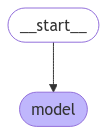

In [56]:
# draw the graph
drawGraph(app)

In [57]:
query = "Hi! I'm John."

input_messages = [HumanMessage(query)]
output = app.invoke({"messages": input_messages})

In [58]:
output['messages'][-1].pretty_print()

================================== Ai Message ==================================

Hi John! How can I assist you today?


In [59]:
output['messages'][-1].content

'Hi John! How can I assist you today?'

In [60]:
query = "What is my name?"

input_messages = [HumanMessage(query)]
output = app.invoke({"messages": input_messages})

In [61]:
output['messages'][-1].pretty_print()

================================== Ai Message ==================================

I don't have access to personal information about individuals unless it has been shared with me in the course of our conversation. If you'd like to tell me your name, feel free!


### With Persistence

- To add in persistence, we need to pass in a `Checkpointer` when compiling the graph.

In [62]:
# Add memory
memory = MemorySaver()
app = workflow.compile(checkpointer=memory)

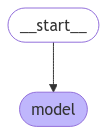

In [63]:
# draw the graph
drawGraph(app)

In [64]:
config = {"configurable": {"thread_id": "1"}}

In [65]:
query = "Hi! I'm John."

input_messages = [HumanMessage(query)]
output = app.invoke({"messages": input_messages}, config)

In [66]:
output['messages'][-1].pretty_print()

================================== Ai Message ==================================

Hi John! How can I assist you today?


In [67]:
output['messages'][-1].content

'Hi John! How can I assist you today?'

In [68]:
query = "What's my name?"

input_messages = [HumanMessage(query)]
output = app.invoke({"messages": input_messages}, config)
output["messages"][-1].pretty_print()

================================== Ai Message ==================================

Your name is John! How can I help you today?


In [69]:
output['messages'][-1].pretty_print()

================================== Ai Message ==================================

Your name is John! How can I help you today?
